In [ ]:
'''Task - Prediction using Supervised ML
To Predict the percentage of marks of the students based on the number of hours they studied'''

Importing necssary libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
da = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
da.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
da.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values in our Dataset. So we can move forward

In [4]:
da.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Now we can visualize our Dataset.

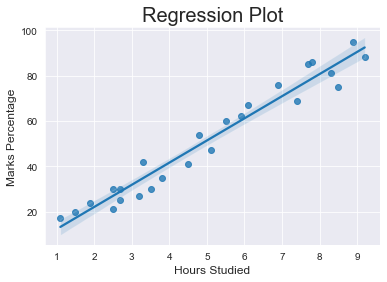

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [14]:
sns.regplot(x= da['Hours'], y= da['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(da.corr())

Both are Postively correlated.

In [34]:
x = da[['Hours']]
y = da.Scores
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [35]:
print("Intercept:-",lm.intercept_)
print("Coefficient:-",lm.coef_)

Intercept:- 2.483673405373196
Coefficient:- [9.77580339]


In [48]:
x_new = pd.DataFrame({'Hours':[5.1]})
x_new.head()

,Hours
0,5.1


In [49]:
lm.predict(x_new)

0    52.340271
dtype: float64

This means that when student will study for 5.1 hours they can score aprrox. 52.340 %

In [45]:
lm = smf.ols(formula = 'Scores ~ Hours', data=da).fit()
lm.pvalues

Intercept    3.367785e-01
Hours        9.132624e-17
dtype: float64

pvalues is < alpha (0.05) ? (True)

so we can reject the ho hypothesis that there is no relationship exists between hours and scores

**Now, lets see the model confidence**

In [50]:
lm.rsquared

0.9529481969048356

So, our model is 95% confident

# What will be the predicted score if a student studies for 8.30 hrs/ day?

In [62]:
x_new = pd.DataFrame({'Hours':[8.30]})
x_new.head()

,Hours
0,8.3


In [63]:
lm.predict(x_new)

0    83.622842
dtype: float64

So, according to our model if a student studies for 8.30 hr/day, then he/she can score aprrox. 83%